In [10]:
import sys
import os
from sklearn.datasets import make_classification
import pandas as pd


In [11]:
# Add the parent directory to sys.path
sys.path.append(os.path.abspath(".."))  

from mcp.multiclasspredict import run_classification

In [12]:
# load the real data

X_raw_1 = pd.read_csv('../input/HP_multiomics/Amplicon_X.csv', sep="\t", index_col=0)
X_raw_2 = pd.read_csv('../input/HP_multiomics/RNA_X.csv', sep="\t", index_col=0)
y_raw = pd.read_csv('../input/HP_multiomics/metadata.csv', sep = "\t", index_col=0)


In [13]:
# make sure X and y have same index
index_intersect = X_raw_1.index.intersection(X_raw_2.index)
index_intersect = index_intersect.intersection(y_raw.index)

X_raw_1 = X_raw_1.loc[index_intersect]
X_raw_2 = X_raw_2.loc[index_intersect]
y_raw = y_raw.loc[index_intersect]

X_raw = pd.concat([X_raw_1, X_raw_2], axis=1)

# y must be a 1D df, select only class information
y = y_raw.loc[:,"Sample Condition"]

# check if index aligns
print((X_raw_1.index == X_raw_2.index).all())
print((X_raw_1.index == X_raw.index).all())
print((X_raw.index == y_raw.index).all())

True
True
True


In [ ]:
n_seeds = 3
ks = [10]
result_path = "results/real_data"

run_classification(X_raw_1, y, ks, n_seeds, "rf", None, os.path.join(result_path, f"rf_16s.csv"))
run_classification(X_raw_1, y, ks, n_seeds, "xgb", None, os.path.join(result_path, f"xgb_16s.csv"))
run_classification(X_raw_1, y, ks, n_seeds, "etc", None, os.path.join(result_path, f"etc_16s.csv"))
run_classification(X_raw_1, y, ks, n_seeds, "lgbm", None, os.path.join(result_path, f"lgbm_16s.csv"))

run_classification(X_raw_2, y, ks, n_seeds, "rf", None, os.path.join(result_path, f"rf_trans.csv"))
run_classification(X_raw_2, y, ks, n_seeds, "xgb", None, os.path.join(result_path, f"xgb_trans.csv"))
run_classification(X_raw_2, y, ks, n_seeds, "etc", None, os.path.join(result_path, f"etc_trans.csv"))
run_classification(X_raw_2, y, ks, n_seeds, "lgbm", None, os.path.join(result_path, f"lgbm_trans.csv"))

run_classification(X_raw, y, ks, n_seeds, "rf", None, os.path.join(result_path, f"rf_both.csv"))
run_classification(X_raw, y, ks, n_seeds, "xgb", None, os.path.join(result_path, f"xgb_both.csv"))
run_classification(X_raw, y, ks, n_seeds, "etc", None, os.path.join(result_path, f"etc_both.csv"))
run_classification(X_raw, y, ks, n_seeds, "lgbm", None, os.path.join(result_path, f"lgbm_both.csv"))


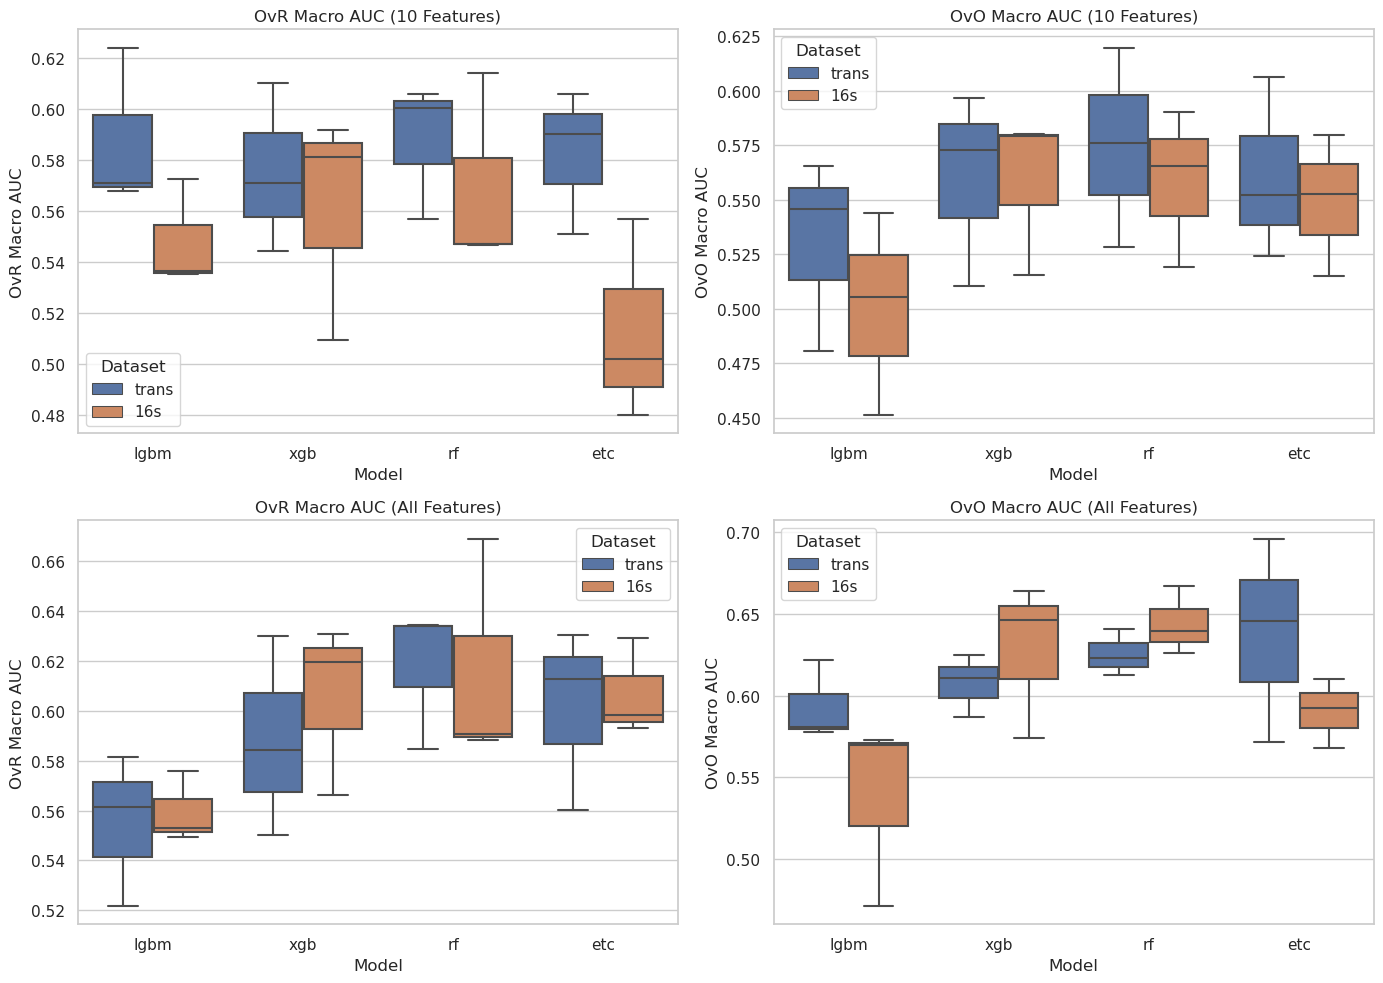

In [4]:
# Plot 

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set your folder path
folder_path = "results/real_data"

# Initialize an empty list to store data
data_list = []

# Loop through files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        
        # Extract model and dataset from filename
        parts = file.split("_")
        model = parts[0]  # e.g., etc, lgbm, rf, xgb
        dataset = parts[1].split(".")[0]  # e.g., 16s, trans
        
        # Read CSV file
        df = pd.read_csv(file_path)
        
        # Add model and dataset as new columns
        df["Model"] = model
        df["Dataset"] = dataset
        
        # Append to list
        data_list.append(df)

# Combine all data into a single DataFrame
combined_df = pd.concat(data_list, ignore_index=True)

# Convert "Features (k)" to numeric
combined_df["Features (k)"] = pd.to_numeric(combined_df["Features (k)"], errors="coerce")

# Separate data based on number of features
df_10_features = combined_df[combined_df["Features (k)"] == 10]
df_all_features = combined_df[combined_df["Features (k)"] != 10]  # Assuming "all features" is any value other than 10

# Set up plotting style
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot OvR Macro AUC for 10 features
sns.boxplot(data=df_10_features, x="Model", y="OvR Macro AUC", hue="Dataset", ax=axes[0, 0])
axes[0, 0].set_title("OvR Macro AUC (10 Features)")

# Plot OvO Macro AUC for 10 features
sns.boxplot(data=df_10_features, x="Model", y="OvO Macro AUC", hue="Dataset", ax=axes[0, 1])
axes[0, 1].set_title("OvO Macro AUC (10 Features)")

# Plot OvR Macro AUC for all features
sns.boxplot(data=df_all_features, x="Model", y="OvR Macro AUC", hue="Dataset", ax=axes[1, 0])
axes[1, 0].set_title("OvR Macro AUC (All Features)")

# Plot OvO Macro AUC for all features
sns.boxplot(data=df_all_features, x="Model", y="OvO Macro AUC", hue="Dataset", ax=axes[1, 1])
axes[1, 1].set_title("OvO Macro AUC (All Features)")

# Adjust layout and save figure
plt.tight_layout()
plt.savefig("AUC_Comparison_10_vs_All_Features.png")
plt.show()

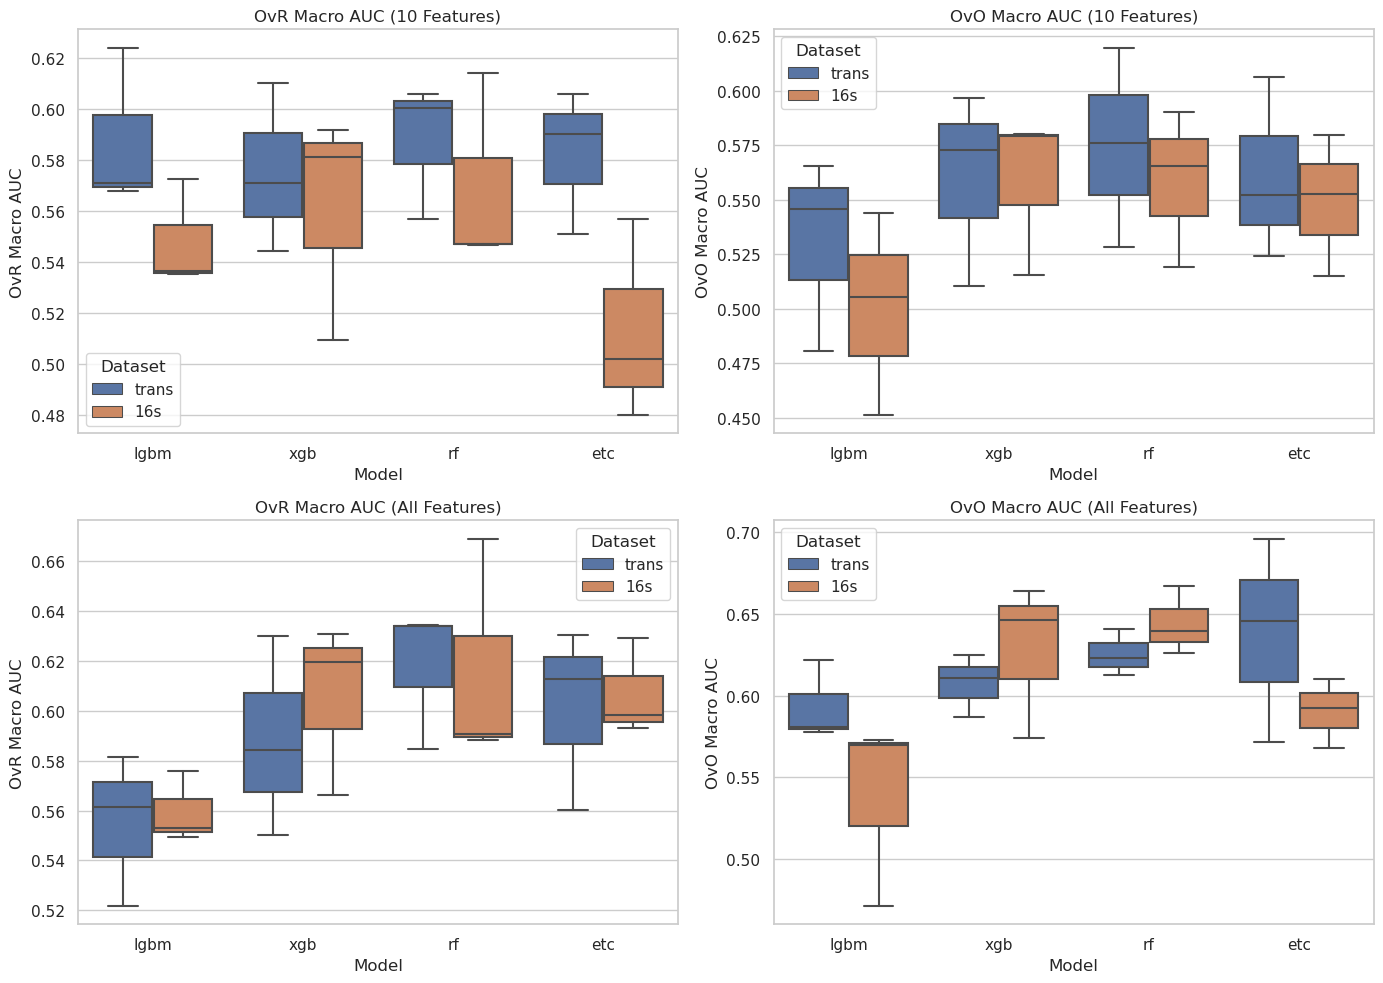

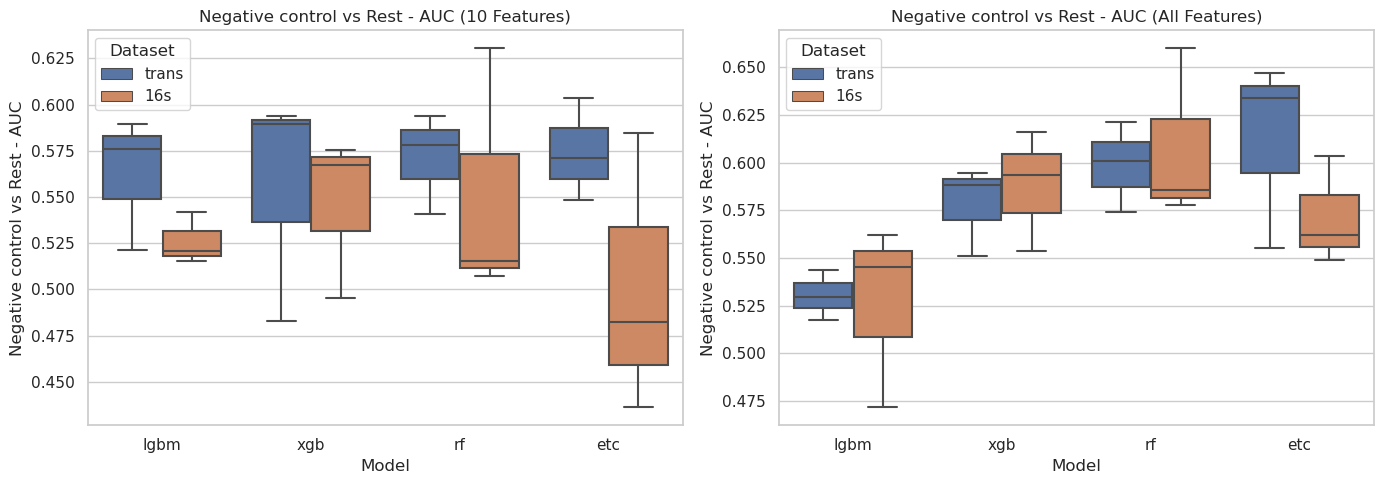

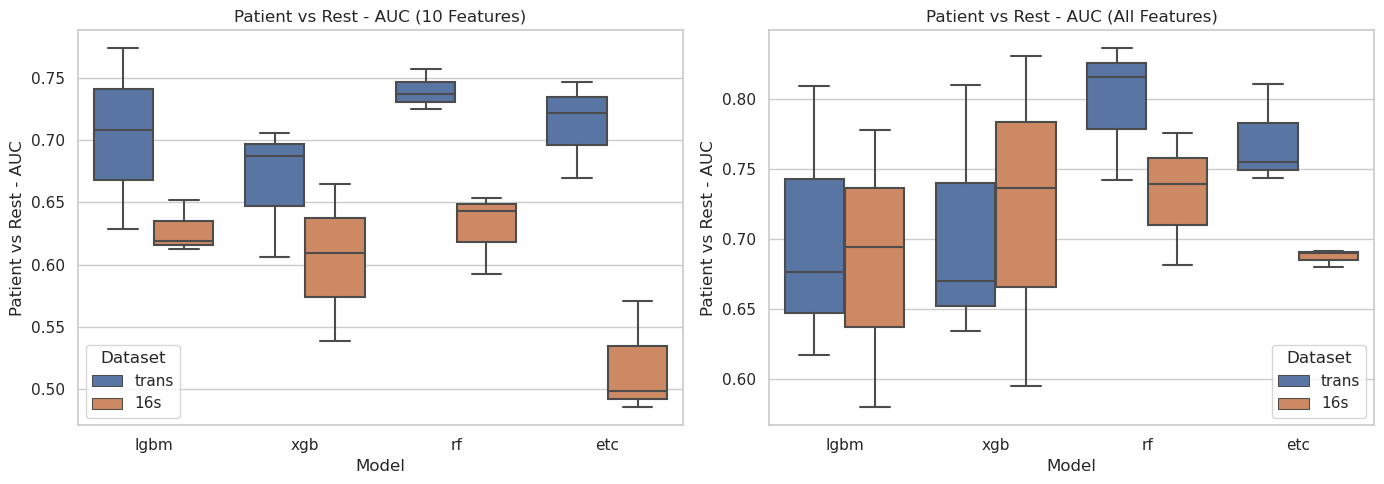

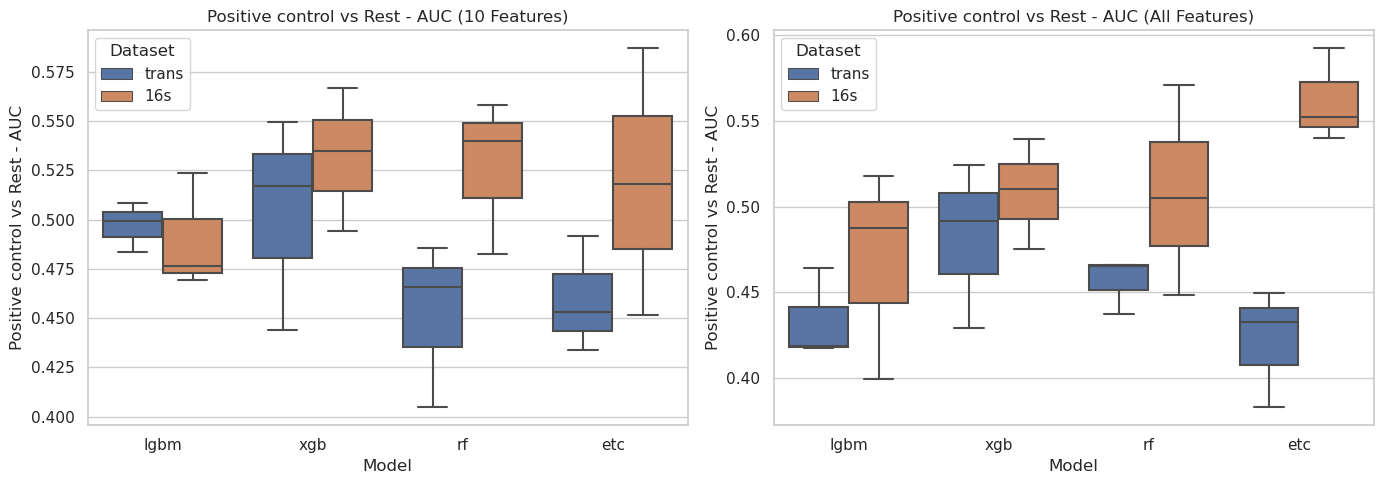

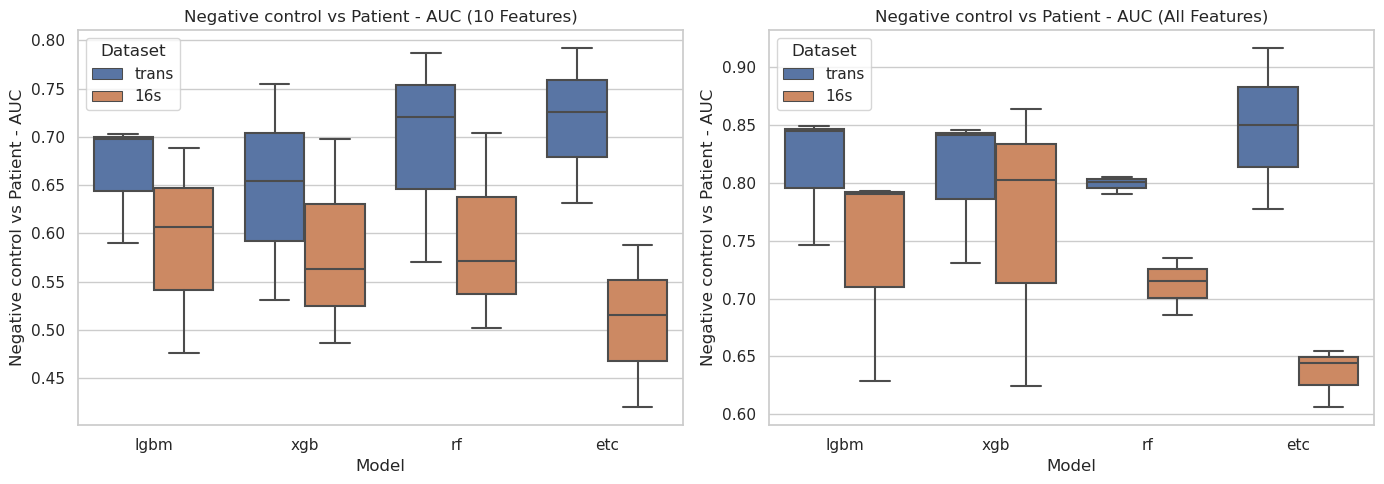

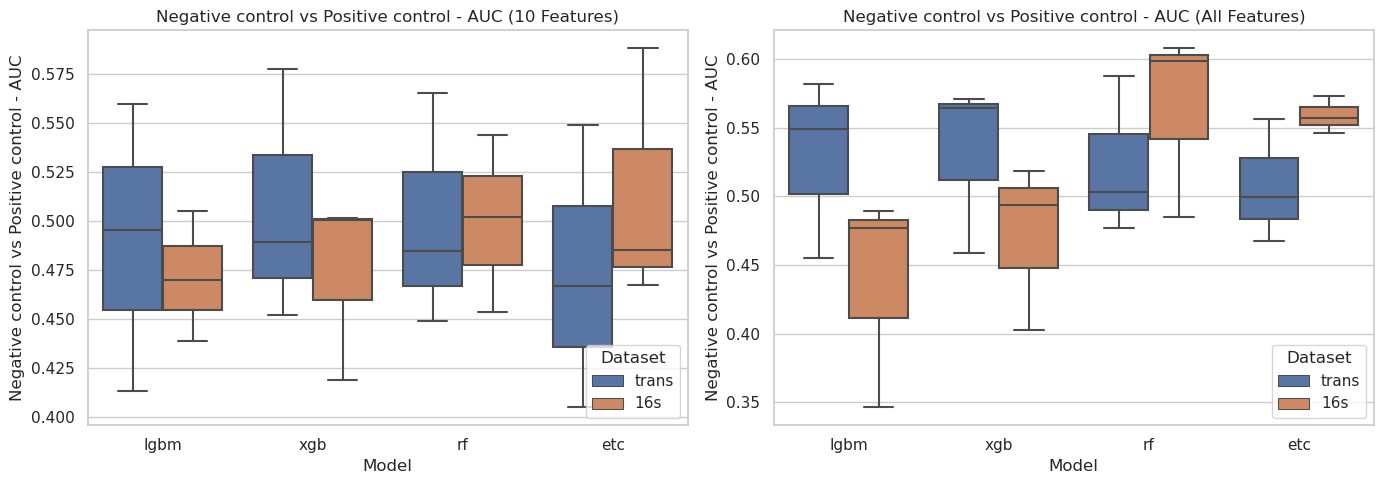

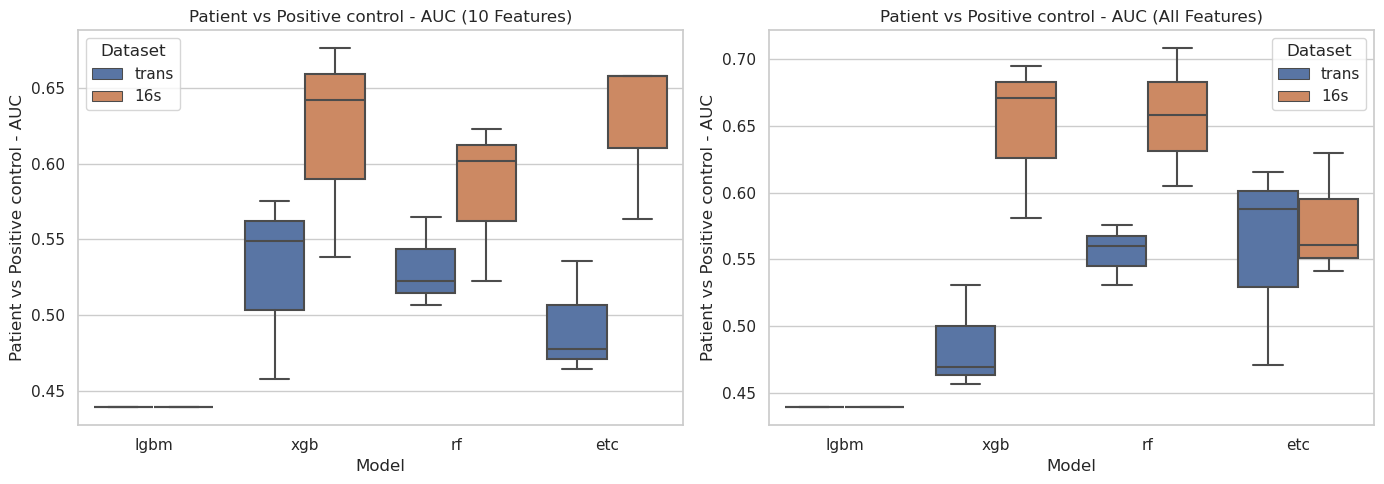

In [5]:
# Combine all data into a single DataFrame
combined_df = pd.concat(data_list, ignore_index=True)

# Convert "Features (k)" to numeric
combined_df["Features (k)"] = pd.to_numeric(combined_df["Features (k)"], errors="coerce")

# Separate data based on number of features
df_10_features = combined_df[combined_df["Features (k)"] == 10]
df_all_features = combined_df[combined_df["Features (k)"] != 10]  # Assuming "all features" means not 10

# Define class-wise AUC columns
class_auc_columns = [
    "Negative control vs Rest - AUC",
    "Patient vs Rest - AUC",
    "Positive control vs Rest - AUC",
    "Negative control vs Patient - AUC",
    "Negative control vs Positive control - AUC",
    "Patient vs Positive control - AUC"
]

# Set up plotting style
sns.set_theme(style="whitegrid")

# --- PLOT OvR and OvO Macro AUC ---

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot OvR Macro AUC for 10 features
sns.boxplot(data=df_10_features, x="Model", y="OvR Macro AUC", hue="Dataset", ax=axes[0, 0])
axes[0, 0].set_title("OvR Macro AUC (10 Features)")

# Plot OvO Macro AUC for 10 features
sns.boxplot(data=df_10_features, x="Model", y="OvO Macro AUC", hue="Dataset", ax=axes[0, 1])
axes[0, 1].set_title("OvO Macro AUC (10 Features)")

# Plot OvR Macro AUC for all features
sns.boxplot(data=df_all_features, x="Model", y="OvR Macro AUC", hue="Dataset", ax=axes[1, 0])
axes[1, 0].set_title("OvR Macro AUC (All Features)")

# Plot OvO Macro AUC for all features
sns.boxplot(data=df_all_features, x="Model", y="OvO Macro AUC", hue="Dataset", ax=axes[1, 1])
axes[1, 1].set_title("OvO Macro AUC (All Features)")

# Adjust layout and save figure
plt.tight_layout()
plt.savefig("AUC_Comparison_10_vs_All_Features.png")
plt.show()

# --- PLOT CLASS-WISE AUCs ---
for col in class_auc_columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Plot for 10 features
    sns.boxplot(data=df_10_features, x="Model", y=col, hue="Dataset", ax=axes[0])
    axes[0].set_title(f"{col} (10 Features)")

    # Plot for all features
    sns.boxplot(data=df_all_features, x="Model", y=col, hue="Dataset", ax=axes[1])
    axes[1].set_title(f"{col} (All Features)")

    # Adjust layout and save the figure
    plt.tight_layout()
    filename = col.replace(" ", "_").replace("-", "").replace("/", "_") + "_Comparison.png"
    plt.savefig(filename)
    plt.show()